In [1]:
with open('final.txt', encoding = "utf8") as file:
    lines = [line.rstrip() for line in file]

In [2]:
lines

["Aduna'y -X- _ O",
 'pagsaka -X- _ O',
 'sa -X- _ O',
 'presyo -X- _ O',
 'sa -X- _ O',
 'lana -X- _ O',
 ', -X- _ O',
 'epektibo -X- _ O',
 'sa -X- _ O',
 'Martes -X- _ O',
 ', -X- _ O',
 'Hunyo -X- _ O',
 '27 -X- _ O',
 ', -X- _ O',
 '2023 -X- _ O',
 '. -X- _ O',
 '',
 'MOTORISTA -X- _ O',
 ', -X- _ O',
 'PATAY -X- _ O',
 'HUMAN -X- _ O',
 'MALIGSAN -X- _ O',
 'ANG -X- _ O',
 'ULO -X- _ O',
 'SA -X- _ O',
 '10-WHEELER -X- _ O',
 'DUMP -X- _ O',
 'TRUCK -X- _ O',
 'Patay -X- _ O',
 'ang -X- _ O',
 'usa -X- _ O',
 'ka -X- _ O',
 'motorista -X- _ O',
 'sa -X- _ O',
 'usa -X- _ O',
 'ka -X- _ O',
 'vehicular -X- _ O',
 'accident -X- _ O',
 'ang -X- _ O',
 'nahitabo -X- _ O',
 'sa -X- _ O',
 'Barangay -X- _ B-LOC',
 'Caidiocan -X- _ I-LOC',
 'sa -X- _ O',
 'Valencia -X- _ B-LOC',
 'mga -X- _ O',
 'alas-6:20 -X- _ O',
 'sa -X- _ O',
 'gabii -X- _ O',
 'niadtong -X- _ O',
 'Sabado -X- _ O',
 ', -X- _ O',
 'Hunyo -X- _ O',
 '24,2023. -X- _ O',
 'Giila -X- _ O',
 'ang -X- _ O',
 'biktima -X-

In [3]:
main_lst=[]
temp_lst = []
no=1
for line in lines:
    if line=='':
        main_lst.append(temp_lst)
        temp_lst=[]
        print(f'Article: {no}')
        no = no+1
    else:
        temp_lst.append(line)

Article: 1
Article: 2
Article: 3
Article: 4
Article: 5
Article: 6
Article: 7
Article: 8
Article: 9
Article: 10
Article: 11
Article: 12
Article: 13
Article: 14
Article: 15
Article: 16
Article: 17
Article: 18
Article: 19
Article: 20
Article: 21
Article: 22
Article: 23
Article: 24
Article: 25
Article: 26
Article: 27
Article: 28
Article: 29
Article: 30
Article: 31
Article: 32
Article: 33
Article: 34
Article: 35
Article: 36
Article: 37
Article: 38
Article: 39
Article: 40
Article: 41
Article: 42
Article: 43
Article: 44
Article: 45
Article: 46
Article: 47
Article: 48
Article: 49
Article: 50
Article: 51
Article: 52
Article: 53
Article: 54
Article: 55
Article: 56
Article: 57
Article: 58
Article: 59
Article: 60
Article: 61
Article: 62
Article: 63
Article: 64
Article: 65
Article: 66
Article: 67
Article: 68
Article: 69
Article: 70
Article: 71
Article: 72
Article: 73
Article: 74
Article: 75
Article: 76
Article: 77
Article: 78
Article: 79
Article: 80
Article: 81
Article: 82
Article: 83
Article: 84
A

In [4]:
main_lst[0]

["Aduna'y -X- _ O",
 'pagsaka -X- _ O',
 'sa -X- _ O',
 'presyo -X- _ O',
 'sa -X- _ O',
 'lana -X- _ O',
 ', -X- _ O',
 'epektibo -X- _ O',
 'sa -X- _ O',
 'Martes -X- _ O',
 ', -X- _ O',
 'Hunyo -X- _ O',
 '27 -X- _ O',
 ', -X- _ O',
 '2023 -X- _ O',
 '. -X- _ O']

In [5]:
#testing for single line
import re
#algo for converting to tuple
#tuple(filter(None,[re.sub('\s','',x) for x in main_lst[0][1].split('-')])) OG 
tuple(filter(None,[re.sub('[\s_]','',x) for x in main_lst[0][1].split(' ')]))

('pagsaka', '-X-', 'O')

In [6]:
final_train=[]
for article in main_lst:
    temp_lst=[]
    for item in article:
        temp_lst.append(tuple(filter(None,[re.sub('[\s_]','',x) for x in item.split(' ')])))
    final_train.append(temp_lst)

In [7]:
len(final_train)

4257

In [8]:
#final output = final_train
final_train[0]

[("Aduna'y", '-X-', 'O'),
 ('pagsaka', '-X-', 'O'),
 ('sa', '-X-', 'O'),
 ('presyo', '-X-', 'O'),
 ('sa', '-X-', 'O'),
 ('lana', '-X-', 'O'),
 (',', '-X-', 'O'),
 ('epektibo', '-X-', 'O'),
 ('sa', '-X-', 'O'),
 ('Martes', '-X-', 'O'),
 (',', '-X-', 'O'),
 ('Hunyo', '-X-', 'O'),
 ('27', '-X-', 'O'),
 (',', '-X-', 'O'),
 ('2023', '-X-', 'O'),
 ('.', '-X-', 'O')]

In [9]:
#splitting
train_sents = final_train[0:2980]
test_sents = final_train[2980:3831]
dev_sents = final_train[3831:]

In [10]:
from torchtext.data import Example
from torchtext.data import Field, Dataset

text_field = Field(sequential=True, tokenize=lambda x:x, include_lengths=True) # Default behaviour is to tokenize by splitting
label_field = Field(sequential=True, tokenize=lambda x:x, is_target=True)

def read_data(sentences):
    examples = []
    fields = {'sentence_labels': ('labels', label_field),
              'sentence_tokens': ('text', text_field)}
    
    for sentence in sentences: 
        tokens = [t[0] for t in sentence]
        labels = [t[2] for t in sentence]
        
        e = Example.fromdict({"sentence_labels": labels, "sentence_tokens": tokens},
                             fields=fields)
        examples.append(e)
    
    return Dataset(examples, fields=[('labels', label_field), ('text', text_field)])

train_data = read_data(train_sents)
dev_data = read_data(dev_sents)
test_data = read_data(test_sents)

print(train_data.fields)
print(train_data[1].text)
print(train_data[1].labels)

print("Train:", len(train_data))
print("Dev:", len(dev_data))
print("Test:", len(test_data))

{'labels': <torchtext.data.field.Field object at 0x000001F7ECA8C150>, 'text': <torchtext.data.field.Field object at 0x000001F7F616E2D0>}
['MOTORISTA', ',', 'PATAY', 'HUMAN', 'MALIGSAN', 'ANG', 'ULO', 'SA', '10-WHEELER', 'DUMP', 'TRUCK', 'Patay', 'ang', 'usa', 'ka', 'motorista', 'sa', 'usa', 'ka', 'vehicular', 'accident', 'ang', 'nahitabo', 'sa', 'Barangay', 'Caidiocan', 'sa', 'Valencia', 'mga', 'alas-6:20', 'sa', 'gabii', 'niadtong', 'Sabado', ',', 'Hunyo', '24,2023.', 'Giila', 'ang', 'biktima', 'nga', 'si', 'Ruperto', 'Solamillo', 'Ausejo', 'Jr.', ',', '46', 'anyos', ',', 'ulitawo', ',', 'ug', 'lumolupyo', 'sa', 'Barangay', 'Pulang', 'Bato', 'sa', 'naasoy', 'nga', 'lungsod.', 'Sumala', 'pa', 'sa', 'imbestigasyon', 'sa', 'kapulisan', 'sa', 'Valencia', ',', 'nagbiyahe', 'ang', 'duha', 'sa', 'managlahing', 'direksyon.', 'Pag-abot', 'sa', 'nahisgutang', 'lugar', ',', 'ni-overtake', 'si', 'Ausejo', 'sa', 'truck', 'ug', 'nawad-an', 'og', 'kontrol', 'sa', 'gimanehong', 'motorsiklo', 'nga', '

In [11]:
VOCAB_SIZE = 20000

text_field.build_vocab(train_data, max_size=VOCAB_SIZE)
label_field.build_vocab(train_data)

## Training

In [12]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [13]:
from torchtext.data import BucketIterator

BATCH_SIZE = 32
train_iter = BucketIterator(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True, 
                            sort_key=lambda x: len(x.text), sort_within_batch=True)
dev_iter = BucketIterator(dataset=dev_data, batch_size=BATCH_SIZE, 
                          sort_key=lambda x: len(x.text), sort_within_batch=True)
test_iter = BucketIterator(dataset=test_data, batch_size=BATCH_SIZE, 
                           sort_key=lambda x: len(x.text), sort_within_batch=True)

## Pre-trained Embeddings

In [14]:
import random
import os
import numpy as np

EMBEDDING_PATH = os.path.join(os.path.expanduser("~"), r'C:\Users\Administrator\Downloads\NER\cc.ceb.300.vec')


def load_embeddings(path):
    """ Load the FastText embeddings from the embedding file. """
    print("Loading pre-trained embeddings")
    
    embeddings = {}
    with open(path, 'r', encoding='utf-8', errors='ignore') as i:
        for line in i:
            if len(line) > 2: 
                line = line.strip().split()
                word = line[0]
                embedding = np.array(line[1:])
                embeddings[word] = embedding
    
    return embeddings
    

def initialize_embeddings(embeddings, vocabulary):
    """ Use the pre-trained embeddings to initialize an embedding matrix. """
    print("Initializing embedding matrix")
    embedding_size = len(embeddings["."])
    embedding_matrix = np.zeros((len(vocabulary), embedding_size), dtype=np.float32)
                                
    for idx, word in enumerate(vocabulary.itos): 
        if word in embeddings:
            embedding_matrix[idx,:] = embeddings[word]
            
    return embedding_matrix

embeddings = load_embeddings(EMBEDDING_PATH)
embedding_matrix = initialize_embeddings(embeddings, text_field.vocab)
embedding_matrix = torch.from_numpy(embedding_matrix).to(device)

Loading pre-trained embeddings
Initializing embedding matrix


## BiLSTM model

In [15]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class BiLSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, output_size, embeddings=None):
        super(BiLSTMTagger, self).__init__()
        
        # 1. Embedding Layer
        if embeddings is None:
            self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        else:
            self.embeddings = nn.Embedding.from_pretrained(embeddings)
        
        # 2. LSTM Layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional=True, num_layers=1)
        
        # 3. Optional dropout layer
        self.dropout_layer = nn.Dropout(p=0.5)

        # 4. Dense Layer
        self.hidden2tag = nn.Linear(2*hidden_dim, output_size)
        
    def forward(self, batch_text, batch_lengths):

        embeddings = self.embeddings(batch_text)
        
        packed_seqs = pack_padded_sequence(embeddings, batch_lengths)
        lstm_output, _ = self.lstm(packed_seqs)
        lstm_output, _ = pad_packed_sequence(lstm_output)
        lstm_output = self.dropout_layer(lstm_output)
        
        logits = self.hidden2tag(lstm_output)
        return logits

## Training

In [16]:
import torch.optim as optim
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import precision_recall_fscore_support, classification_report


def remove_predictions_for_masked_items(predicted_labels, correct_labels): 

    predicted_labels_without_mask = []
    correct_labels_without_mask = []
        
    for p, c in zip(predicted_labels, correct_labels):
        if c > 1:
            predicted_labels_without_mask.append(p)
            correct_labels_without_mask.append(c)
            
    return predicted_labels_without_mask, correct_labels_without_mask


def train(model, train_iter, dev_iter, batch_size, max_epochs, num_batches, patience, output_path):
    criterion = nn.CrossEntropyLoss(ignore_index=1)  # we mask the <pad> labels
    optimizer = optim.Adam(model.parameters())

    train_f_score_history = []
    dev_f_score_history = []
    no_improvement = 0
    for epoch in range(max_epochs):

        total_loss = 0
        predictions, correct = [], []
        for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):
            optimizer.zero_grad()
            
            text_length, cur_batch_size = batch.text[0].shape
            
            pred = model(batch.text[0].to(device), batch.text[1].to(device)).view(cur_batch_size*text_length, NUM_CLASSES)
            gold = batch.labels.to(device).view(cur_batch_size*text_length)
            
            loss = criterion(pred, gold)
            
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

            _, pred_indices = torch.max(pred, 1)
            
            predicted_labels = list(pred_indices.cpu().numpy())
            correct_labels = list(batch.labels.view(cur_batch_size*text_length).numpy())
            
            predicted_labels, correct_labels = remove_predictions_for_masked_items(predicted_labels, 
                                                                                   correct_labels)
            
            predictions += predicted_labels
            correct += correct_labels

        train_scores = precision_recall_fscore_support(correct, predictions, average="micro")
        train_f_score_history.append(train_scores[2])
            
        print("Total training loss:", total_loss)
        print("Training performance:", train_scores)
        
        total_loss = 0
        predictions, correct = [], []
        for batch in dev_iter:

            text_length, cur_batch_size = batch.text[0].shape

            pred = model(batch.text[0].to(device), batch.text[1].to(device)).view(cur_batch_size * text_length, NUM_CLASSES)
            gold = batch.labels.to(device).view(cur_batch_size * text_length)
            loss = criterion(pred, gold)
            total_loss += loss.item()

            _, pred_indices = torch.max(pred, 1)
            predicted_labels = list(pred_indices.cpu().numpy())
            correct_labels = list(batch.labels.view(cur_batch_size*text_length).numpy())
            
            predicted_labels, correct_labels = remove_predictions_for_masked_items(predicted_labels, 
                                                                                   correct_labels)
            
            predictions += predicted_labels
            correct += correct_labels

        dev_scores = precision_recall_fscore_support(correct, predictions, average="micro")
            
        print("Total development loss:", total_loss)
        print("Development performance:", dev_scores)
        
        dev_f = dev_scores[2]
        if len(dev_f_score_history) > patience and dev_f < max(dev_f_score_history):
            no_improvement += 1

        elif len(dev_f_score_history) == 0 or dev_f > max(dev_f_score_history):
            print("Saving model.")
            torch.save(model, output_path)
            no_improvement = 0
            
        if no_improvement > patience:
            print("Development F-score does not improve anymore. Stop training.")
            dev_f_score_history.append(dev_f)
            break
            
        dev_f_score_history.append(dev_f)
        
    return train_f_score_history, dev_f_score_history

In [17]:
def test(model, test_iter, batch_size, labels, target_names): 
    
    total_loss = 0
    predictions, correct = [], []
    for batch in test_iter:

        text_length, cur_batch_size = batch.text[0].shape

        pred = model(batch.text[0].to(device), batch.text[1].to(device)).view(cur_batch_size * text_length, NUM_CLASSES)
        gold = batch.labels.to(device).view(cur_batch_size * text_length)

        _, pred_indices = torch.max(pred, 1)
        predicted_labels = list(pred_indices.cpu().numpy())
        correct_labels = list(batch.labels.view(cur_batch_size*text_length).numpy())

        predicted_labels, correct_labels = remove_predictions_for_masked_items(predicted_labels, 
                                                                               correct_labels)

        predictions += predicted_labels
        correct += correct_labels
    
    print(classification_report(correct, predictions, labels=labels, target_names=target_names))

In [18]:
import math

EMBEDDING_DIM = 300
HIDDEN_DIM = 256
NUM_CLASSES = len(label_field.vocab)
MAX_EPOCHS = 50
PATIENCE = 3
OUTPUT_PATH = r'C:\Users\Administrator\Downloads\NER\bilstmtagger'
num_batches = math.ceil(len(train_data) / BATCH_SIZE)

tagger = BiLSTMTagger(EMBEDDING_DIM, HIDDEN_DIM, VOCAB_SIZE+2, NUM_CLASSES, embeddings=embedding_matrix)  

train_f, dev_f = train(tagger.to(device), train_iter, dev_iter, BATCH_SIZE, MAX_EPOCHS, 
                       num_batches, PATIENCE, OUTPUT_PATH)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 0:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 64.89326079189777
Training performance: (0.8569013412184336, 0.8569013412184336, 0.8569013412184336, None)
Total development loss: 5.377665638923645
Development performance: (0.8970282720621443, 0.8970282720621443, 0.8970282720621443, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 1:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 32.969632267951965
Training performance: (0.8829897966625341, 0.8829897966625341, 0.8829897966625341, None)
Total development loss: 3.4396070539951324
Development performance: (0.9242164212808238, 0.9242164212808238, 0.9242164212808238, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 2:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 23.89897871762514
Training performance: (0.9082362612956051, 0.9082362612956051, 0.9082362612956051, None)
Total development loss: 2.920116811990738
Development performance: (0.9306295727576551, 0.9306295727576551, 0.9306295727576551, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 3:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 20.66011982411146
Training performance: (0.9185058972506016, 0.9185058972506016, 0.9185058972506016, None)
Total development loss: 2.5589787885546684
Development performance: (0.9411977237828562, 0.9411977237828562, 0.9411977237828562, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 4:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 19.20456101745367
Training performance: (0.9236307704547413, 0.9236307704547413, 0.9236307704547413, None)
Total development loss: 2.4167138636112213
Development performance: (0.9447204407912564, 0.9447204407912564, 0.9447204407912564, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 5:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 17.57698517665267
Training performance: (0.9296241538655334, 0.9296241538655334, 0.9296241538655334, None)
Total development loss: 2.2359350249171257
Development performance: (0.9472495709511336, 0.9472495709511336, 0.9472495709511336, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 6:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 16.577089831233025
Training performance: (0.9331910125768234, 0.9331910125768234, 0.9331910125768234, None)
Total development loss: 2.1881566643714905
Development performance: (0.9516755487309186, 0.9516755487309186, 0.9516755487309186, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 7:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 15.61247942224145
Training performance: (0.9367446115903019, 0.9367446115903019, 0.9367446115903019, None)
Total development loss: 2.1501238867640495
Development performance: (0.9503206575738415, 0.9503206575738415, 0.9503206575738415, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 8:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 14.858186427503824
Training performance: (0.9391777661387097, 0.9391777661387097, 0.9391777661387097, None)
Total development loss: 2.068772815167904
Development performance: (0.950591635805257, 0.950591635805257, 0.950591635805257, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 9:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 14.272256691008806
Training performance: (0.940821968667334, 0.940821968667334, 0.940821968667334, None)
Total development loss: 2.1366827189922333
Development performance: (0.950772287959534, 0.950772287959534, 0.950772287959534, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 10:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 13.706688694655895
Training performance: (0.9432551232157419, 0.9432551232157419, 0.9432551232157419, None)
Total development loss: 2.033145286142826
Development performance: (0.9542950049679343, 0.9542950049679343, 0.9542950049679343, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 11:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 13.00996707007289
Training performance: (0.9449192152910835, 0.9449192152910835, 0.9449192152910835, None)
Total development loss: 1.981594990938902
Development performance: (0.9542950049679343, 0.9542950049679343, 0.9542950049679343, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 12:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 12.672224190086126
Training performance: (0.9457877254977359, 0.9457877254977359, 0.9457877254977359, None)
Total development loss: 1.943765226751566
Development performance: (0.9576370698220577, 0.9576370698220577, 0.9576370698220577, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 13:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 11.917007464915514
Training performance: (0.9490628708571731, 0.9490628708571731, 0.9490628708571731, None)
Total development loss: 2.0438882745802402
Development performance: (0.9549272875079036, 0.9549272875079036, 0.9549272875079036, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 14:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 11.57559110596776
Training performance: (0.9499380109127313, 0.9499380109127313, 0.9499380109127313, None)
Total development loss: 1.9477934688329697
Development performance: (0.9580887002077499, 0.9580887002077499, 0.9580887002077499, None)
Saving model.


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 15:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 11.061476608738303
Training performance: (0.9526164698706516, 0.9526164698706516, 0.9526164698706516, None)
Total development loss: 1.9615320228040218
Development performance: (0.955198265739319, 0.955198265739319, 0.955198265739319, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 16:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 10.458342242985964
Training performance: (0.9542208933058416, 0.9542208933058416, 0.9542208933058416, None)
Total development loss: 1.9203600212931633
Development performance: (0.9562821786649806, 0.9562821786649806, 0.9562821786649806, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 17:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 9.950888462364674
Training performance: (0.9557987973454085, 0.9557987973454085, 0.9557987973454085, None)
Total development loss: 1.9745796136558056
Development performance: (0.9561015265107037, 0.9561015265107037, 0.9561015265107037, None)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16420\4049597506.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch in tqdm(train_iter, total=num_batches, desc=f"Epoch {epoch}"):


Epoch 18:   0%|          | 0/94 [00:00<?, ?it/s]

Total training loss: 10.256751973181963
Training performance: (0.9544330484708253, 0.9544330484708253, 0.9544330484708253, None)
Total development loss: 1.9380989745259285
Development performance: (0.956553156896396, 0.956553156896396, 0.956553156896396, None)
Development F-score does not improve anymore. Stop training.


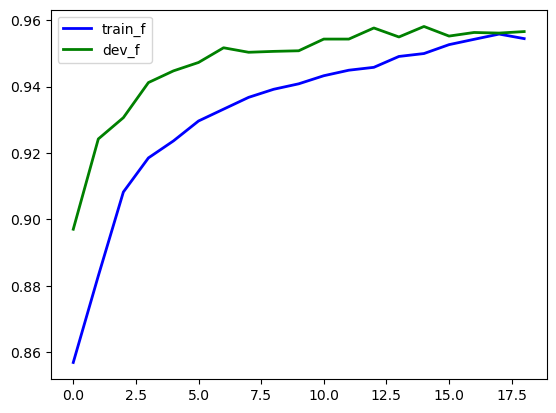

In [19]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

# Data
df = pd.DataFrame({'epochs': range(0,len(train_f)), 
                  'train_f': train_f, 
                   'dev_f': dev_f})
 
# multiple line plot
plt.plot('epochs', 'train_f', data=df, color='blue', linewidth=2)
plt.plot('epochs', 'dev_f', data=df, color='green', linewidth=2)
plt.legend()
plt.show()

In [20]:
tagger = torch.load(OUTPUT_PATH)
tagger.eval()


BiLSTMTagger(
  (embeddings): Embedding(20002, 300)
  (lstm): LSTM(300, 256, bidirectional=True)
  (dropout_layer): Dropout(p=0.5, inplace=False)
  (hidden2tag): Linear(in_features=512, out_features=11, bias=True)
)

In [21]:
labels = label_field.vocab.itos[3:]
labels = sorted(labels, key=lambda x: x.split("-")[-1])
label_idxs = [label_field.vocab.stoi[l] for l in labels]

test(tagger, test_iter, BATCH_SIZE, labels = label_idxs, target_names = labels)

              precision    recall  f1-score   support

       B-LOC       0.79      0.74      0.76       383
       I-LOC       0.70      0.70      0.70       273
       I-ORG       0.82      0.70      0.75       420
       B-ORG       0.74      0.35      0.47       312
     I-OTHER       0.63      0.31      0.42       109
     B-OTHER       0.64      0.10      0.17        91
       B-PER       0.84      0.90      0.87       524
       I-PER       0.82      0.89      0.86       264

   micro avg       0.79      0.68      0.73      2376
   macro avg       0.75      0.59      0.63      2376
weighted avg       0.78      0.68      0.71      2376

